### Practice 1: Creating and Plotting Signals and Waves

#### Creating classes for Cosine and Sine Wave

In [493]:
import numpy as np
import matplotlib.pyplot as plt
import math

from IPython.display import Audio

In [494]:
class Signal:
    def __add__(self, other):
        """Adds two signals"""
        if(other == 0):
            return self
        else:
            return SumSignal(self, other)
    
    def make_wave(self, duration=1, start=0, framerate=11025):
        """Makes a Wave object.

        duration: float seconds
        start: float seconds
        framerate: int frames per second

        returns: Wave
        """
        n = round(duration * framerate)
        ts = start + np.arange(n) / framerate
        ys = self.evaluate(ts)
        return Wave(ys, ts, framerate=framerate)

    def plot(self, duration=None, period_length=3, **options):
        if duration is None:
            duration = self.period * period_length
        wave = self.make_wave(duration)
        wave.plot()
        
    def make_audio(self, duration = 3):
        wave = self.make_wave(duration)
        wave.make_audio()

In [495]:
class SumSignal(Signal):
    def __init__(self, *args):
        self.signals = args
    
    @property
    def period(self):
        return max(signal.period for signal in self.signals)
    
    def evaluate(self, ts):
        ts = np.asarray(ts)
        return sum(signal.evaluate(ts) for signal in self.signals)

In [497]:
class Sinusoid(Signal):
    """Represents sinusoidal signal"""
    
    def __init__(self, freq=440, amp=1.0, offset=0, func=np.sin):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func
    
    ##Get function
    @property
    def period(self):
        return 1.0 / self.freq
    
    ## Evaluate - producing the signal from the properties
    def evaluate(self, ts):
        """ts is a float array of times that would come from the Wave class"""
        "phase = 2*pi*f*t + offset"
        ts = np.asarray(ts)
        phases = 2 * math.pi * self.freq * ts + self.offset
        ys = self.amp * self.func(phases)
        return ys

In [498]:
def CosSignal(freq, amp=1.0, offset=0):
    return Sinusoid(freq, amp, offset, func=np.cos)

In [499]:
def SinSignal(freq, amp=1.0, offset=0):
    return Sinusoid(freq, amp, offset, func=np.sin)

In [500]:
class Wave:
    """Class is meant to take in a Signal and return a certain wave interval"""
    def __init__(self, ys, ts=None, framerate=None):
        self.ys = np.asarray(ys)
        "Initializes framerate default value"
        self.framerate = framerate if not None else 11025
        if ts is None:
            self.ts = np.arange(len(ys)) / self.framerate
        else:
            self.ts = np.asarray(ts)
            
    def plot(self, **options):
        """plots the real value of the Wave"""
        """**args passes a dictionary of arguments that maps to values - can be inserted into plot()"""
        plt.plot(self.ts, np.real(self.ys), **options)
    
    def make_audio(self):
        return Audio(data=self.ys.real, rate=self.framerate)

In [501]:
def decorate(**options):
    plt.gca().set(**options)
    plt.tight_layout()

### Create Sin and Cos Waves

##### Make Sinusoid Signals

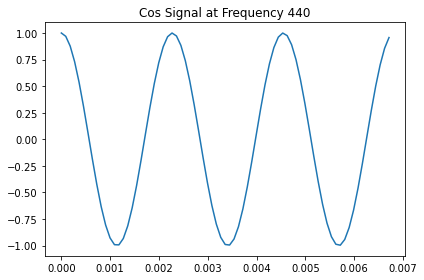

In [502]:
cosSignalOne = CosSignal(freq=440)
cosSignalOne.plot(period_length=3)
decorate(title='Cos Signal at Frequency 440')

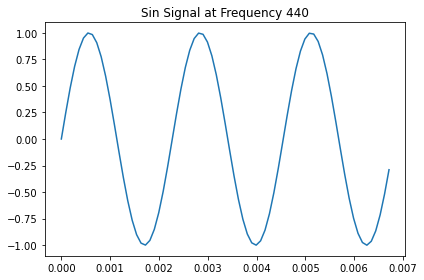

In [503]:
sinSignalOne = SinSignal(freq=440)
sinSignalOne.plot(period_length=3)
decorate(title='Sin Signal at Frequency 440')

##### Make Cos Wave

In [504]:
cosWaveOne = cosSignalOne.make_wave(duration=3)
cosWaveOne.make_audio()

##### Make Sin Wave

In [505]:
sinWaveOne = sinSignalOne.make_wave(duration=3)
sinWaveOne.make_audio()

##### Make Cos Wave with Double and Half Frequency

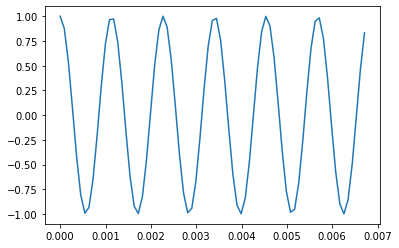

In [506]:
duration = cosSignalOne.period * 3

cosSignalOneDoubled = CosSignal(freq=880)
cosSignalOneDoubled.plot(duration=duration)

cosWaveDoubled = cosSignalOneDoubled.make_wave(duration = 3)
cosWaveDoubled.make_audio()

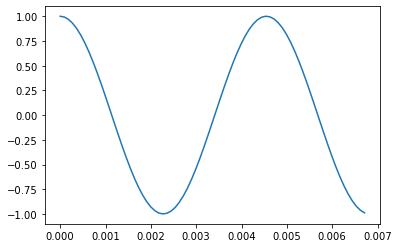

In [507]:
cosSignalOneHalved = CosSignal(freq=220)
cosSignalOneHalved.plot(duration=duration)

cosWaveHalved = cosSignalOneHalved.make_wave(duration = 3)
cosWaveHalved.make_audio()

### Add Two Waves Together

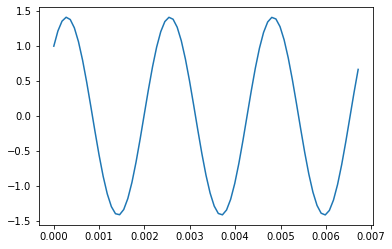

In [508]:
## Has a different start point
summedWave = cosSignalOne + sinSignalOne
summedWave.plot()


### Plotting Square Waves Using Cosines

In [ ]:
squareWave = SquareWave(440)